In [1]:
%pylab inline
from sklearn import ensemble, cross_validation, learning_curve, metrics 

import numpy as np
import pandas as pd

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
#import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

Populating the interactive namespace from numpy and matplotlib


C:\Users\Alexander\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Alexander\Anaconda2\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


# data review

In [2]:
train_df = pd.read_csv('train.csv',sep='\t')
test_df = pd.read_csv('test.csv',sep='\t')

In [3]:
test_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,336,337,338,339,340,341,342,343,344,345
0,0,NaN,1,0,0,1,0,0,0.136364,0,...,0.192984,0,1,0,0,0.222222,1,1,1,1
1,1,NaN,1,0,0,1,0,0,0.181818,0,...,0.195690,0,1,0,0,0.000000,1,1,1,0
2,2,NaN,1,0,0,0,0,0,0.090909,0,...,0.192984,0,1,0,0,0.222222,1,1,1,0
3,3,NaN,1,0,0,1,0,0,0.090909,0,...,0.195690,0,1,0,0,0.000000,1,1,1,0
4,4,NaN,1,0,0,1,0,0,0.090909,0,...,0.289893,0,0,1,0,0.000000,1,1,1,1


In [4]:
train_df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,336,337,338,339,340,341,342,343,344,345
0,0,1,1,0,0,0,0,0,0.090909,0,...,0.221395,0,1,0,0,0.222222,1,1,1,1
1,1,1,1,0,0,1,0,0,0.090909,0,...,0.241508,0,1,0,0,0.111111,1,1,1,0
2,2,0,1,0,0,1,0,0,0.090909,0,...,0.123067,0,1,0,0,0.444444,1,1,1,1
3,3,0,1,0,0,1,0,0,0.136364,0,...,0.296065,0,0,1,0,0.222222,1,1,1,0
4,4,0,1,0,0,1,0,0,0.136364,0,...,0.178956,0,0,1,0,0.111111,1,1,1,1


In [5]:
train_df=train_df.replace([np.inf, -np.inf], np.nan).dropna()
test_df=test_df.replace([np.inf, -np.inf], np.nan).dropna()

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30500 entries, 0 to 30499
Columns: 347 entries, Unnamed: 0 to 345
dtypes: float64(106), int64(241)
memory usage: 81.0 MB


In [7]:
X=train_df.drop(['0'], axis=1)
Y=train_df['0']

In [8]:
X=X.drop(['Unnamed: 0'], axis=1)
means=X.mean(axis=0)

In [9]:
means

1      0.977902
2      0.021934
3      0.000164
4      0.437672
5      0.000623
6      0.000721
7      0.096431
8      0.003344
9      0.021934
10     0.942951
11     0.999836
12     0.986262
13     0.366842
14     0.007180
15     0.020590
16     0.004164
17     0.002820
18     0.024951
19     0.025967
20     0.044590
21     0.038754
22     0.051082
23     0.036131
24     0.028361
25     0.029049
26     0.005377
27     0.003213
28     0.006295
29     0.005049
30     0.021508
         ...   
316    0.003016
317    0.116830
318    0.934230
319    0.514413
320    0.393682
321    0.031165
322    0.370960
323    0.384393
324    0.523536
325    0.426029
326    0.652448
327    0.819687
328    0.215065
329    0.784560
330    0.174790
331    0.810592
332    0.564492
333    0.494289
334    0.800805
335    0.441590
336    0.306157
337    0.489672
338    0.401607
339    0.050426
340    0.001246
341    0.085858
342    0.965934
343    0.985541
344    0.953803
345    0.626230
Length: 345, dtype: floa

#  Scale the data

In [10]:
X_scaled=StandardScaler().fit_transform(X)

In [11]:
X_scaled

array([[ 0.15032543, -0.14975425, -0.01280474, ...,  0.12112451,
         0.22007777,  0.77256627],
       [ 0.15032543, -0.14975425, -0.01280474, ...,  0.12112451,
         0.22007777, -1.29438734],
       [ 0.15032543, -0.14975425, -0.01280474, ...,  0.12112451,
         0.22007777,  0.77256627],
       ...,
       [ 0.15032543, -0.14975425, -0.01280474, ...,  0.12112451,
         0.22007777,  0.77256627],
       [ 0.15032543, -0.14975425, -0.01280474, ...,  0.12112451,
         0.22007777,  0.77256627],
       [ 0.15032543, -0.14975425, -0.01280474, ...,  0.12112451,
         0.22007777,  0.77256627]])

In [12]:
from sklearn.decomposition import PCA

## decomposition via PCA

In [13]:
pca = PCA(n_components=60)

In [14]:
X_pca_scaled=pca.fit_transform(X_scaled)

In [15]:
X_pca_scaled.shape

(30500L, 60L)

In [16]:
(X_train, 
 X_test, 
 y_train, y_test) = train_test_split(X_pca_scaled, Y, 
                                     test_size=0.3, 
                                     random_state=0)

In [17]:
rf=RandomForestClassifier(n_estimators = 1000,n_jobs=-1)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
test_df = pd.read_csv('test.csv',sep='\t')
X_val=test_df.drop(['Unnamed: 0'], axis=1)
X_val=X_val.drop(['0'], axis=1)

In [18]:
X_val

,1,2,3,4,5,6,7,8,9,10,...,336,337,338,339,340,341,342,343,344,345
0,1,0,0,1,0,0,0.136364,0,0,1,...,0.192984,0,1,0,0,0.222222,1,1,1,1
1,1,0,0,1,0,0,0.181818,0,0,1,...,0.195690,0,1,0,0,0.000000,1,1,1,0
2,1,0,0,0,0,0,0.090909,0,0,1,...,0.192984,0,1,0,0,0.222222,1,1,1,0
3,1,0,0,1,0,0,0.090909,0,0,1,...,0.195690,0,1,0,0,0.000000,1,1,1,0
4,1,0,0,1,0,0,0.090909,0,0,1,...,0.289893,0,0,1,0,0.000000,1,1,1,1
5,1,0,0,1,0,0,0.090909,0,0,1,...,0.206963,0,1,0,0,0.000000,1,1,1,0
6,1,0,0,0,0,0,0.181818,0,0,1,...,0.450414,1,0,0,0,0.000000,1,1,1,0
7,1,0,0,0,0,0,0.090909,0,0,1,...,0.450414,1,0,0,0,0.000000,1,1,1,0
8,1,0,0,0,0,0,0.090909,0,0,1,...,0.109160,1,0,0,0,0.000000,1,1,1,1
9,1,0,0,1,0,0,0.090909,0,0,1,...,0.134028,0,1,0,0,0.111111,1,1,1,1


In [18]:
X_test_scaled=StandardScaler().fit_transform(X_val)

In [21]:
predictions=rf.predict(X_test)

In [22]:
roc_auc_score(y_test,predictions)

0.5281015677372766

In [23]:
#LogisticRegression

LR=LogisticRegression()
LR.fit(X_train,y_train)
predictionsLR=LR.predict(X_test)
roc_auc_score(y_test,predictionsLR)

0.5095963082983697

In [24]:
#SGDClassifier
sgd=SGDClassifier()
sgd.fit(X_train,y_train)
predictionsSGD=sgd.predict(X_test)
roc_auc_score(y_test,predictionsSGD)

C:\Users\Alexander\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.5711822316637893

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predictionsDT=decision_tree.predict(X_test)
roc_auc_score(y_test,predictionsDT)

0.5459095212150548

In [26]:
# XGBoost
gbm = xgb.XGBClassifier()
gbm.fit(X_train, y_train)
predictionsGBM=gbm.predict(X_test)
roc_auc_score(y_test,predictionsGBM)

NameError: name 'xgb' is not defined

In [ ]:
#Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
predictionsSVC=linear_svc.predict(X_test)
roc_auc_score(y_test,predictionsSVC)

In [ ]:
#kNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predictionsKNN=knn.predict(X_test)
roc_auc_score(y_test,predictionsKNN)

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, y_train)
predictionsPerc=perceptron.predict(X_test)
roc_auc_score(y_test,predictionsPerc)

In [43]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
predictionsNB=gaussian.predict(X_test)
roc_auc_score(y_test,predictionsNB)

0.6028237130292763

In [ ]:
gaussian.fit(X_test, y_test)

In [ ]:
X_test_pca=pca.fit_transform(X_test_scaled)
X_test_pca.shape

In [ ]:
predG=gaussian.predict(X_test_pca)

In [ ]:
# тут грейдер дал 0.577
submission = pd.DataFrame({
        "_ID_": range(0,4166),
        "_VAL_": predG
    })
submission.to_csv('submission_Gauss.csv', index=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import grid_search

In [ ]:
from mlxtend.classifier import StackingClassifier
from mlxtend.feature_selection import ColumnSelector
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection


In [ ]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1,n_estimators=500)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],
                          use_probas=True,
                          average_probas=False,
                          meta_classifier=clf3)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X_test, y_test, 
                                              cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

In [ ]:
sclf.fit(X_train,y_train)

In [ ]:
pred=sclf.predict(X_test)

In [ ]:
roc_auc_score(y_test,pred)

In [ ]:
clf2.fit(X_train,y_train)
predd=clf2.predict(X_test)
roc_auc_score(y_test,predd)

In [ ]:
clf22 = RandomForestClassifier(random_state=1,n_estimators=500)

In [ ]:
clf22.fit(X_test,y_test)

In [ ]:
predd2=clf22.predict(X_train)
roc_auc_score(y_train,predd2)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)

grid.fit(X_pca_scaled, Y)
predGrid=grid.predict(X_test_pca)

In [ ]:
from sklearn.model_selection import cross_val_predict
target = np.array([0] * 5 + [1] * 5)

sss = model_selection.StratifiedShuffleSplit(n_splits = 4, test_size = 0.2)

gaussian2 = GaussianNB()
y_pred = cross_val_predict(gaussian2, X_train, y_train, cv=10, n_jobs=-1)

In [109]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [27]:
import matplotlib.pyplot as plt

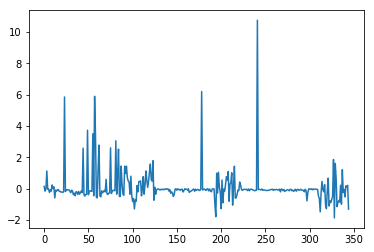

In [36]:
plt.plot(X_scaled[7])

In [19]:
from sklearn.feature_selection import SelectKBest,chi2

In [20]:
X_new=SelectKBest(chi2,k=2).fit_transform(X,Y)

In [41]:
X_new.shape

(30500L, 2L)

In [42]:
X_new

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 0.]])

In [21]:
(X_train, 
 X_test, 
 y_train, y_test) = train_test_split(X_new, Y, 
                                     test_size=0.3, 
                                     random_state=0)

In [48]:
# Gaussian Naive Bayes
rocs=[]
for i in range(3,345):
    X_new=SelectKBest(chi2,k=i).fit_transform(X,Y)

    (X_train, 
     X_test, 
     y_train, y_test) = train_test_split(X_new, Y, 
                                         test_size=0.3, 
                                         random_state=0)
    gaussiann = GaussianNB()
    gaussiann.fit(X_train, y_train)
    predictionsNB2=gaussiann.predict(X_test)
    rocc=roc_auc_score(y_test,predictionsNB2)
    rocs.append(rocc)

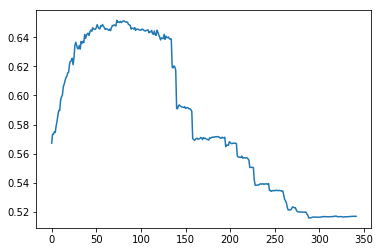

In [49]:
plt.plot(rocs)

In [50]:
max(rocs)

0.6516820433644879

In [51]:
rocs.index(max(rocs))

73

In [87]:
    X_new=SelectKBest(chi2,k=75).fit_transform(X,Y)

    (X_train, 
     X_test, 
     y_train, y_test) = train_test_split(X_new, Y, 
                                         test_size=0.3, 
                                         random_state=0)
    gaussiann = GaussianNB()
    gaussiann.fit(X_new, Y)
  

GaussianNB(priors=None)

In [88]:
pca = PCA(n_components=75)

In [89]:
X_pca_scaled=pca.fit_transform(X_scaled)

In [63]:
(X_train, 
 X_test, 
 y_train, y_test) = train_test_split(X_pca_scaled, Y, 
                                     test_size=0.3, 
                                     random_state=0)

In [86]:
# Gaussian Naive Bayes
rocNB=[]
for i in range(2,345):
    pca = PCA(n_components=75)
    X_pca_scaled=pca.fit_transform(X_scaled)
    (X_train, 
     X_test, 
     y_train, y_test) = train_test_split(X_pca_scaled, Y, 
                                         test_size=0.3, 
                                         random_state=0)
    gaussian = GaussianNB()
    gaussian.fit(X_train, y_train)
    predictionsNB=gaussian.predict(X_test)
    aa=roc_auc_score(y_test,predictionsNB)
    rocNB.append(aa)

KeyboardInterrupt: 

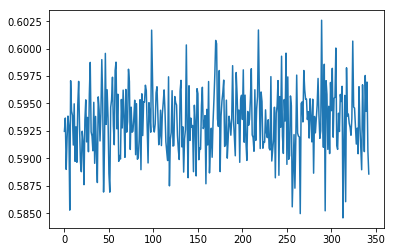

In [66]:
plt.plot(rocNB)

In [82]:
selector=SelectKBest(chi2,k=76)
selector.fit(X,Y)
For_pred=selector.transform(X_val)

In [83]:
    X_new=selector.transform(X)
    (X_train, 
     X_test, 
     y_train, y_test) = train_test_split(X_new, Y, 
                                         test_size=0.3, 
                                         random_state=0)
    gaussiann = GaussianNB()
    gaussiann.fit(X_train, y_train)
    predictionsNB2=gaussiann.predict(X_test)
    roc_auc_score(y_test,predictionsNB2)
    predictionsNB3=gaussiann.predict(For_pred)

In [84]:
roc_auc_score(y_test,predictionsNB2)

0.6516820433644879

In [86]:
submission = pd.DataFrame({
        "_ID_": range(0,4166),
        "_VAL_": predictionsNB3
    })
submission.to_csv('submission_Gauss3.csv', index=False)

#  Отлично,дорос до 0,655

## Check the data again

In [98]:
train = pd.read_csv('train.csv', index_col='Unnamed: 0', sep='\t')
test = pd.read_csv('test.csv', index_col='Unnamed: 0', sep='\t')

xtrain = train.drop('0', axis=1)
ytrain = train['0']
xtest = test.drop('0', axis=1)
ytest = test['0']

In [99]:
#columns with zeros
cols_to_drop = ['9', '140', '164', '11', '5', '129', '130', '137', '138', '141', '149', '150', '178', '186', '188',
                '192', '193', '291', '301', '303', '305', '152', '160', '191', '182', '185', '181', '172', '170',
                '157', '136', '135']

xtrain.drop(cols_to_drop, axis=1, inplace=True)
xtest.drop(cols_to_drop, axis=1, inplace=True)

In [104]:
X_train, X_holdout, y_train, y_holdout = train_test_split(xtrain, ytrain,
                                                    test_size=0.20,
                                                    random_state=42, stratify=ytrain)

In [106]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split, RandomizedSearchCV, KFold
kf = KFold(n_splits=10)
skf = StratifiedKFold(n_splits=10)

In [107]:
estimator = LogisticRegression(random_state=666)

params = {
    'C' : (0.1, 0.15, 0.2, 0.25, 0.5, 0.8, 1)
}

gs = GridSearchCV(
    estimator=estimator,
    param_grid=params,
    cv=skf,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

gs.fit(X=X_train,y=y_train)

best_lr = gs.best_estimator_
best_score = gs.best_score_

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   45.7s finished


In [108]:
print("Baseline = ", best_score)

('Baseline = ', 0.7275343586829855)


In [116]:
predd=gs.predict(X_holdout)

In [117]:
roc_auc_score( y_holdout,predd)

0.5482318022889856

In [115]:
submission = pd.DataFrame({
        "_ID_": range(0,4166),
        "_VAL_": predd
    })
submission.to_csv('submission_new.csv', index=False)

# lightGBM

In [119]:
import lightgbm as lgb
params = {
    'objective': 'binary',
    'learning_rate': 0.1,
    'num_threads': 4,
    "metric": 'auc',
    'random_seed': 666,
}
n_rounds = 10000

lgb_train = lgb.Dataset(xtrain, label=ytrain, free_raw_data=False)

In [120]:
result = lgb.cv(params,
                lgb_train,
                n_rounds,
                folds=skf.split(xtrain, ytrain),
                early_stopping_rounds=10,
                verbose_eval=1)

[1]	cv_agg's auc: 0.686362 + 0.0102095
[2]	cv_agg's auc: 0.694582 + 0.0102184
[3]	cv_agg's auc: 0.698598 + 0.00900459
[4]	cv_agg's auc: 0.700617 + 0.00866554
[5]	cv_agg's auc: 0.703707 + 0.00742721
[6]	cv_agg's auc: 0.708083 + 0.00831141
[7]	cv_agg's auc: 0.709926 + 0.00937122
[8]	cv_agg's auc: 0.711865 + 0.00918754
[9]	cv_agg's auc: 0.713788 + 0.00988344
[10]	cv_agg's auc: 0.715976 + 0.00935391
[11]	cv_agg's auc: 0.71732 + 0.00861337
[12]	cv_agg's auc: 0.718068 + 0.00921695
[13]	cv_agg's auc: 0.719177 + 0.00923234
[14]	cv_agg's auc: 0.720281 + 0.00898898
[15]	cv_agg's auc: 0.721359 + 0.00895576
[16]	cv_agg's auc: 0.722496 + 0.00864592
[17]	cv_agg's auc: 0.724102 + 0.00897849
[18]	cv_agg's auc: 0.724801 + 0.00895238
[19]	cv_agg's auc: 0.726207 + 0.00868798
[20]	cv_agg's auc: 0.727395 + 0.00849264
[21]	cv_agg's auc: 0.728462 + 0.00842135
[22]	cv_agg's auc: 0.729353 + 0.00894822
[23]	cv_agg's auc: 0.730253 + 0.00889804
[24]	cv_agg's auc: 0.730941 + 0.00840724
[25]	cv_agg's auc: 0.731411 

In [122]:
result

{u'auc-mean': [0.6863621365065378,
  0.6945822794160751,
  0.698598103606772,
  0.7006166779411991,
  0.7037070107408402,
  0.7080827867569501,
  0.7099260437530968,
  0.7118648429233019,
  0.7137877267605015,
  0.7159759804678717,
  0.7173204775893123,
  0.71806812515145,
  0.7191767802407666,
  0.720280905956367,
  0.7213590471490786,
  0.7224956309540213,
  0.7241020625725866,
  0.7248012153830917,
  0.7262070208267838,
  0.7273946336463113,
  0.7284622254184242,
  0.7293528477140392,
  0.7302525713368874,
  0.7309413375748215,
  0.7314112094190468,
  0.7320487612958128,
  0.7325061154406545,
  0.7329708772783305,
  0.7336537839611652,
  0.7342517848347999,
  0.7348601171426619,
  0.7352018936567559,
  0.7359732421049625,
  0.736157335137567,
  0.7365617086861078,
  0.7371577543729606,
  0.7376930070169186,
  0.7379222369461743,
  0.7382121734989865,
  0.738323361619828,
  0.7386104119585623,
  0.7388435513517185,
  0.7391789392454465,
  0.7395050988824712,
  0.7396019835905351,
  0

In [123]:
params = {
    #default
    'objective': 'binary',
    'learning_rate': 0.05,
    'num_threads': -1,
    "metric": 'auc',
    'random_seed': 666,

    #regularization
#     'l2-leaf-reg': 6,
    'colsample_bytree': 0.6,
    'subsample': 0.6,
    'subsample_freq': 1
}

result = lgb.cv(params, lgb_train, n_rounds, folds=skf.split(xtrain, ytrain),
                early_stopping_rounds=10, verbose_eval=1)

[1]	cv_agg's auc: 0.673938 + 0.011513
[2]	cv_agg's auc: 0.688957 + 0.0122199
[3]	cv_agg's auc: 0.696471 + 0.0114683
[4]	cv_agg's auc: 0.699559 + 0.010747
[5]	cv_agg's auc: 0.704846 + 0.00984765
[6]	cv_agg's auc: 0.707711 + 0.00987932
[7]	cv_agg's auc: 0.709628 + 0.00889804
[8]	cv_agg's auc: 0.711373 + 0.00909009
[9]	cv_agg's auc: 0.71227 + 0.00869173
[10]	cv_agg's auc: 0.713157 + 0.00797793
[11]	cv_agg's auc: 0.714049 + 0.00821536
[12]	cv_agg's auc: 0.714752 + 0.00877605
[13]	cv_agg's auc: 0.715498 + 0.00803839
[14]	cv_agg's auc: 0.71641 + 0.00812718
[15]	cv_agg's auc: 0.71707 + 0.0083202
[16]	cv_agg's auc: 0.717688 + 0.00832247
[17]	cv_agg's auc: 0.718024 + 0.00877073
[18]	cv_agg's auc: 0.71873 + 0.00856991
[19]	cv_agg's auc: 0.719576 + 0.00872096
[20]	cv_agg's auc: 0.720089 + 0.00869216
[21]	cv_agg's auc: 0.720568 + 0.00851186
[22]	cv_agg's auc: 0.721616 + 0.0085683
[23]	cv_agg's auc: 0.72246 + 0.00848291
[24]	cv_agg's auc: 0.723118 + 0.00841485
[25]	cv_agg's auc: 0.723361 + 0.008551

In [124]:
srav = lgb.LGBMClassifier(**params)
srav.fit(xtrain, ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
        learning_rate=0.05, max_depth=-1, metric='auc',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, num_threads=-1,
        objective='binary', random_seed=666, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.6,
        subsample_for_bin=200000, subsample_freq=1, verbose=1)

In [126]:
pr=srav.predict(xtest)

C:\Users\Alexander\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [127]:
pr[:20]

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [129]:
predd=srav.predict(X_holdout)

C:\Users\Alexander\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [130]:
roc_auc_score( y_holdout,predd)

0.574552379727178